# Analysis and Visualisation

Now that the data has been transformed, we need to draw deeper insights from the data.

We will dive deeper into the dataset to identify any patterns or trends not visible by our previous analysis. By gaining these deeper insights, management can make more informed decisions about which loans are higher risk for the company

In [23]:
import pandas as pd
from matplotlib import pyplot
from data_plot import Plotter

plot = Plotter() # initialise the class

df = pd.read_csv('loan_payments_cleaned.csv') # load data as a dataframe

--------------

### Current state of the loans

While performing the analysis in this milestone it can be helpful to have the data dictionary on hand to get an overview of what each column represents. The data dictionary is displayed in Milestone 2 task 3.

We will query the data to check the current state of the payments:

Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. Visualise your results on an appropriate graph.

In [10]:
def calculate_percentage(df, top_col, bottom_col):
    top = df[top_col].sum()
    bottom = df[bottom_col].sum()
    percentage = ( top / bottom ) * 100
    return percentage

#percentage of recovery against total amount funded = total payments received / total amount funded
recovery_percentage_total = calculate_percentage(df, 'total_payment', 'funded_amount')

#percentage of recovery against investor funding = total payments received from investors / investor funding
recovery_percentage_investor = calculate_percentage(df, 'total_payment_inv', 'funded_amount_inv')

print(f'total: {round(recovery_percentage_total)}%, investor: {round(recovery_percentage_investor)}%')

total: 59%, investor: 58%


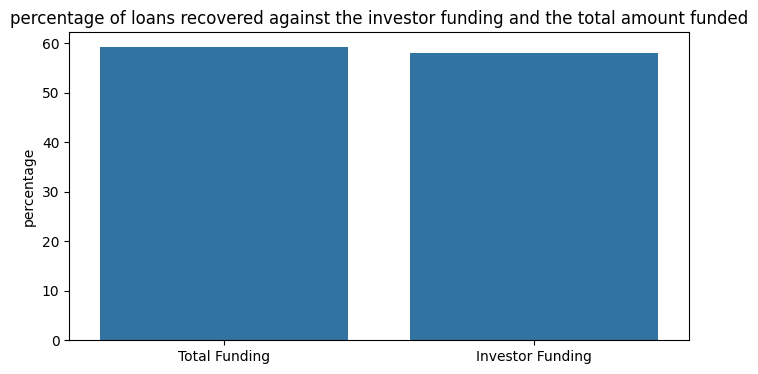

In [11]:
plot.bar_chart(['Total Funding', 'Investor Funding'], [recovery_percentage_total, recovery_percentage_investor], 
          title='percentage of loans recovered against the investor funding and the total amount funded', y_label='percentage', x_label=None)

----------------------

### Calculating loss

The company wants to check what percentage of loans have been a loss to the company:

Loans marked as Charged Off in the loan_status column represent a loss to the company.


Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

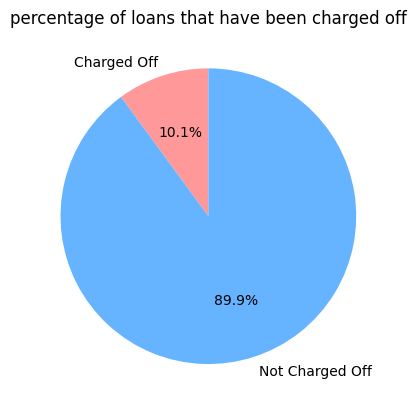

In [12]:
# percentage loans that have been charged off 

charged_off_df = df[df['loan_status']=='Charged Off'].copy() # get subset of df where loan status = charged off

charged_off_count_percentage = ( len(charged_off_df) / len(df) ) * 100
charged_off_count_percentage

plot.pie_chart(['Charged Off', 'Not Charged Off'], [charged_off_count_percentage, 100 - charged_off_count_percentage], title='percentage of loans that have been charged off')

The total amount that was paid towards these loans before being charged off is £215277.12547145947
Meaning actual loss was 233352.72258131055


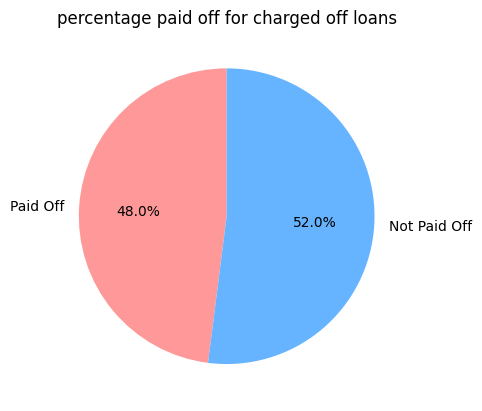

In [13]:
# total amount that was paid towards these loans before being charged off

charge_off_total_payment = charged_off_df['total_payment'].sum()
charge_off_funded_amount = charged_off_df['funded_amount'].sum()

charged_off_paid_percentage = calculate_percentage(charged_off_df, 'total_payment', 'funded_amount')
actual_loss = charge_off_funded_amount - charge_off_total_payment

print(f'The total amount that was paid towards these loans before being charged off is £{charge_off_total_payment}')
print(f'Meaning actual loss was {actual_loss}')
actual_loss_pie = plot.pie_chart(['Paid Off', 'Not Paid Off'], [charged_off_paid_percentage, 100 - charged_off_paid_percentage], title='percentage paid off for charged off loans')
actual_loss_pie


---------------

### Calculating projected loss

Calculate the projected loss of the loans marked as Charged Off.

Calculate the loss in revenue these loans would have generated for the company if they had finished their term.

In [14]:
# Estimate Future Revenue for Each Loan (Total Repayment Amount=Loan Amount+(Loan Amount×Interest Rate×Loan Term))
charged_off_df['total_repayment_amount'] = charged_off_df['funded_amount'] + (charged_off_df['funded_amount'] * (charged_off_df['int_rate']/100)) 
# Subtract the actual revenue received from the estimated total revenue to determine the loss
charged_off_df['projected_loss'] = charged_off_df['total_repayment_amount'] - charged_off_df['total_payment'] 


projected_loss = charged_off_df['projected_loss'].sum() # Calculating total loss of revenue for all 'Charged Off' loans.

projected_loss


302465.9486605325

Visualise the loss projected over the remaining term of these loans.

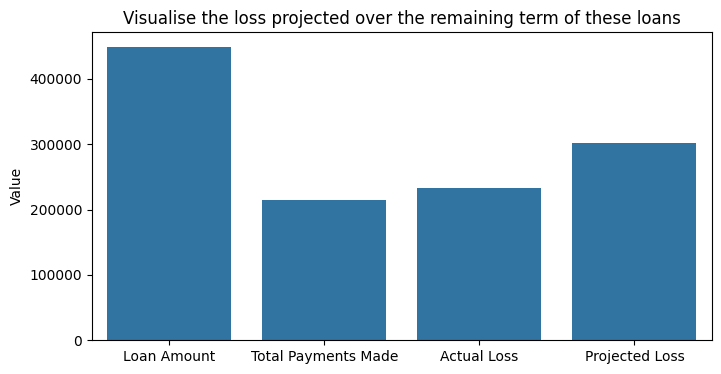

In [15]:
loan_amount = charged_off_df['funded_amount'].sum()
total_payments_made = charged_off_df['total_payment'].sum()

categories = ['Loan Amount', 'Total Payments Made', 'Actual Loss', 'Projected Loss'] # bar char categories
values = [loan_amount, total_payments_made, actual_loss, projected_loss] # corresponding bar chart values

plot.bar_chart(categories, values, title='Visualise the loss projected over the remaining term of these loans', y_label='Value', x_label=None) # visualise for comparison


We see that actual loss is much smaller than the projected loss if the loans were not charged off.

Now we plot loss as a percentage of the loan amount to compare differences in actual and potential loss

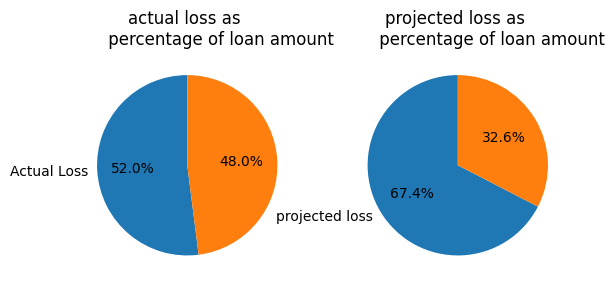

In [16]:
projected_loss_percentage = calculate_percentage(charged_off_df, 'projected_loss', 'funded_amount')
actual_loss_percentage = 100 - calculate_percentage(charged_off_df, 'total_payment', 'funded_amount')

# pie charts side by side
pyplot.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
pyplot.pie([actual_loss_percentage, 100 - actual_loss_percentage], labels=['Actual Loss',''], autopct='%1.1f%%', startangle=90)
#pyplot.axis('equal')
pyplot.title('''actual loss as 
             percentage of loan amount''')

# Create the second pie chart
pyplot.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
pyplot.pie([projected_loss_percentage, 100 - projected_loss_percentage], labels=['projected loss',''], autopct='%1.1f%%', startangle=90)
#pyplot.axis('equal')
pyplot.title('''projected loss as 
             percentage of loan amount''')

# Show the combined plot
pyplot.show()

----------------------

### Possible loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue.

If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [17]:
df['loan_status'].unique() # look at the types of status' to get a list of those corresponding to late

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Loans with the status `'In Grace Period'`, `'Late (31-120 days)'` and `'Late (16-30 days)'` represent customers behind on their payments

In [18]:
late_status = ['Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)']

late_df = df[df['loan_status'].isin(late_status)].copy() # get subset of df where loan status = late

What percentage do users' in this bracket currently represent as a percentage of all loans?

There are a total of 938 customers in the late bracket


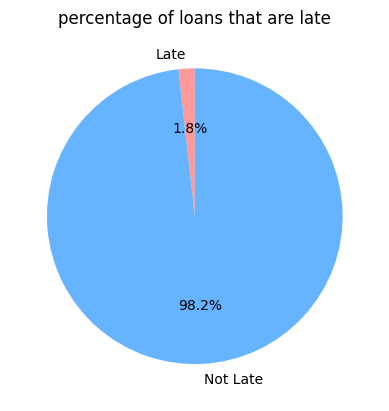

In [19]:
# percentage of loans that are late
late_count_percentage = ( len(late_df) / len(df) ) * 100

print(f'There are a total of {len(late_df)} customers in the late bracket')

plot.pie_chart(['Late', 'Not Late'], [late_count_percentage, 100 - late_count_percentage], title='percentage of loans that are late')

How much loss the company would incur their status was changed to Charged Off. 

What is the projected loss of these loans if the customer were to finish the full loans term?

The total amount that has been paid to these loans is £44686.64810822398
Meaning possible loss is 37439.91198386517


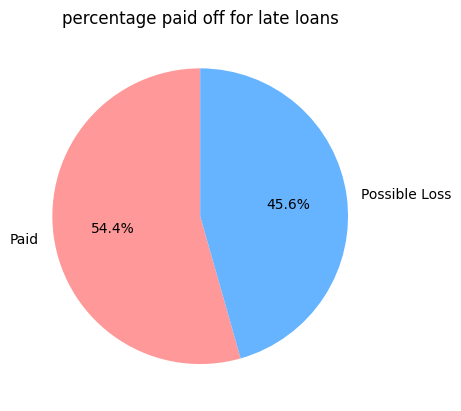

In [20]:
late_total_payment = late_df['total_payment'].sum()
late_funded_amount = late_df['funded_amount'].sum()

late_paid_percentage = calculate_percentage(late_df, 'total_payment', 'funded_amount')
possible_loss = late_funded_amount - late_total_payment

print(f'The total amount that has been paid to these loans is £{late_total_payment}')
print(f'Meaning possible loss is {possible_loss}')
possible_loss_pie = plot.pie_chart(['Paid', 'Possible Loss'], [late_paid_percentage, 100 - late_paid_percentage], title='percentage paid off for late loans')
possible_loss_pie

Now we look at the projected potential loss of these loans if the customer were to finish the full loans term.

The projected possible loss is £50583
This is a difference of £13143 from the possible loss


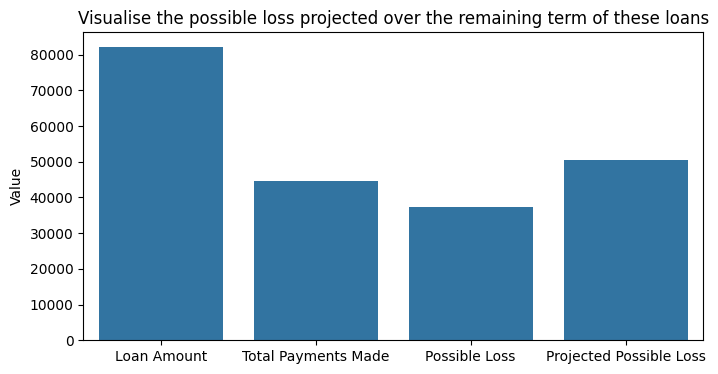

In [21]:
late_df['total_repayment_amount'] = late_df['funded_amount'] + (late_df['funded_amount'] * (late_df['int_rate']/100)) 
# Subtract the actual revenue received from the estimated total revenue to determine the loss
late_df['projected_loss'] = late_df['total_repayment_amount'] - late_df['total_payment'] 


projected_possible_loss = late_df['projected_loss'].sum() # Calculating total loss of revenue for all 'Charged Off' loans.

projected_possible_loss

print(f'The projected possible loss is £{round(projected_possible_loss)}')
print(f'This is a difference of £{round(projected_possible_loss - possible_loss)} from the possible loss')


categories = ['Loan Amount', 'Total Payments Made', 'Possible Loss', 'Projected Possible Loss'] # bar char categories
values = [late_df['funded_amount'].sum(), late_df['total_payment'].sum(), possible_loss, projected_possible_loss] # corresponding bar chart values

plot.bar_chart(categories, values, title='Visualise the possible loss projected over the remaining term of these loans', y_label='Value', x_label=None) # visualise for comparison


If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

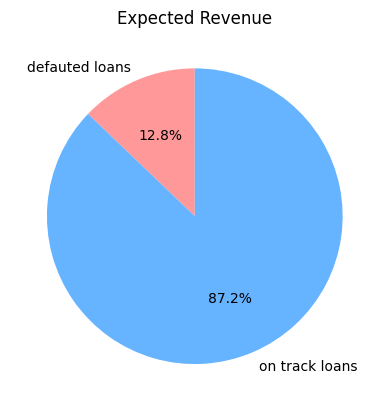

In [22]:
df['expected_revenue'] = df['funded_amount'] + (df['funded_amount'] * (df['int_rate']/100)) # calculate expected revenue for all loans

# list of all status that represent defaulted, charged off, or late loans
bad_status = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

bad_df = df[df['loan_status'].isin(bad_status)].copy() # get subset of df where loan status = bad

bad_revenue = bad_df['expected_revenue'].sum()
total_revenue = df['expected_revenue'].sum()

plot.pie_chart(['defauted loans', 'on track loans'], [bad_revenue, total_revenue - bad_revenue], title='Expected Revenue')


We can see that late customers and those who have already defaulted on their loan represent 12.8% of total expected revenue

----------------------